In [1]:

# Pandas and Numpy for data structures and util fucntions
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

import cnn_utils as utils
#from model_evaluation_utils import get_metrics

# Matplot Imports
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from keras import callbacks
from keras import optimizers
#from keras.datasets import cifar10
from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

import os
from scipy import stats
import itertools, random
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sn

Using TensorFlow backend.


In [3]:
import cv2
import glob
import numpy as np
np.random.seed(1)
X_data = []
files = sorted(glob.glob ('/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/*.png'))
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
    X_data.append (image)

print('X_data shape:', np.array(X_data).shape)

/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11130000_1605729884_2_2_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11130000_1605729884_2_3_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11130000_1605729884_2_4_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11130000_1605729884_2_5_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11130000_1606946762_2_2_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11130000_1606946762_2_3_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11130000_1606946762_2_4_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11130000_1606946762_2_5_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11620000_1605134631_Raw_0_2_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GAN_train/62/11620000_1605134631_Raw_0_3_62.png
/mnt/HDD02/WGAN/old_backup/110Signs/Original_data/GA

In [4]:
labels = []
for i in files:
    if '62' in i:
        labels.append(0)
#     elif 'UD' in i:
#         labels.append(1)

print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pdb

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
from scipy.spatial import Delaunay
import pandas as pd

In [6]:
X=np.array(X_data)
np_labels=np.array(labels)

In [7]:
def plot_generator():
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111,projection='3d') 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    ax.set_title('3 component t-SNE', fontsize = 20)
    ax.grid()
    return fig, ax

In [8]:
pca = PCA(n_components = 3)
pcaX = X.reshape(X.shape[0],-1)
# pcaY = np.argmax(y_train,axis=-1)
# pcaY = pcaY.reshape(y_train.shape[0])
pcaY = np_labels
print(pcaX.shape)
print(pcaY.shape)

(11, 49152)
(11,)


In [9]:
principalComponents = pca.fit_transform(pcaX,y=pcaY)

In [10]:
hull = Delaunay(principalComponents) 

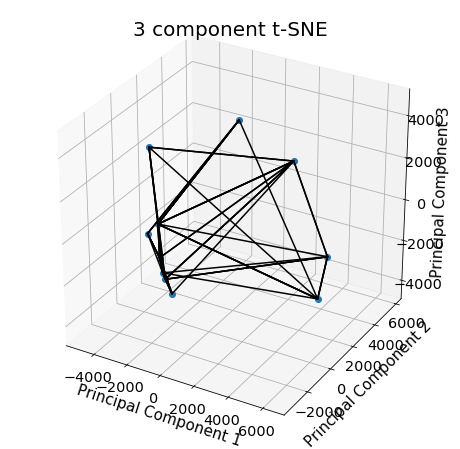

In [11]:
fig, ax = plot_generator()
ax.plot(principalComponents[:,0], principalComponents[:,1],principalComponents[:,2], 'o')
for simplex in hull.simplices:
    ax.plot(principalComponents[simplex, 0], principalComponents[simplex, 1],principalComponents[simplex, 2], 'k-')
plt.show()  

In [12]:
import itertools, random
RS = 123
tsneX = X.reshape(X.shape[0],-1)
tsneY = np_labels
tsneout = TSNE(n_components = 3,random_state=RS).fit_transform(tsneX)

In [13]:
hull = Delaunay(tsneout) 

In [14]:
hull.simplices


array([[ 1,  8,  4,  7],
       [ 0,  1,  4,  7],
       [ 0,  6,  4,  7],
       [ 0,  6,  1,  4],
       [ 0,  2,  7,  9],
       [ 0,  6,  7,  9],
       [ 5,  1,  8,  4],
       [ 5,  6,  4,  9],
       [ 5,  6,  1,  4],
       [10,  5,  8,  9],
       [10,  2,  8,  9],
       [10,  0,  2,  9],
       [10,  0,  6,  9],
       [10,  5,  6,  9],
       [10,  2,  8,  7],
       [10,  0,  2,  7],
       [ 3,  0,  6,  1],
       [ 3,  5,  6,  1],
       [ 3,  5,  1,  8],
       [ 3, 10,  0,  6],
       [ 3, 10,  5,  6],
       [ 3,  1,  8,  7],
       [ 3,  0,  1,  7],
       [ 3, 10,  5,  8],
       [ 3, 10,  8,  7],
       [ 3, 10,  0,  7]], dtype=int32)

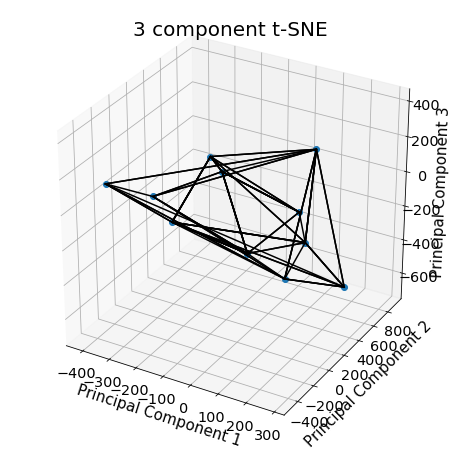

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plot_generator()
ax.plot(tsneout[:,0], tsneout[:,1],tsneout[:,2], 'o')
for simplex in hull.simplices:
    ax.plot(tsneout[simplex, 0], tsneout[simplex, 1],tsneout[simplex, 2], 'k-')
plt.show() 
plt.savefig('t-SNE convex haull for class Walk')

In [16]:
# Load Kinematically rejected data

np.random.seed(42)
X_data = []
files = sorted(glob.glob ('/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/*.png'))
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    image = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
    X_data.append (image)

print('X_data shape:', np.array(X_data).shape)

/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00014.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00025.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00029.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00032.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00035.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00038.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00041.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00043.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00044.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00056.png
/mnt/HDD02/WGAN/old_backup/110Signs/second_turn_leftover/single_class/UD/image_00061.png
/mnt/HDD02/WGAN/old_b

In [17]:
labels = []
for i in files:
    if 'UD' in i:
        labels.append(0)

In [18]:
X=np.array(X_data)
np_labels=np.array(labels)

In [19]:
import itertools, random
RS = 123
tsneX = X.reshape(X.shape[0],-1)
tsneY = np_labels
tsneout1 = TSNE(n_components = 3,random_state=RS).fit_transform(tsneX)
data=tsneout1

In [132]:
norm = np.linalg.norm(data,axis=1)
print(norm)
mdev = np.percentile(norm,90,axis=0)  
print(mdev)
data_keep = data[norm<mdev,:]

[ 354.63675   240.93565   642.10364   596.837     123.33415   231.75252
  361.69904   217.75577   206.06166   231.29335    69.567024  173.28249
  244.91772   113.066216  274.61304   130.13715  3896.283     233.74648
  211.66608   250.65384   552.0128    223.08218  1268.189      54.05591
  242.29398   248.24437   130.58244   303.98596   219.70914   253.40115
  193.66568   232.26736   250.1469    180.27759   802.73773   268.05908
  261.8817   2321.6567    227.36597   274.97516   267.90085   131.09477
  267.23965   139.15036   157.07797   230.40067   293.5099    225.77522
  318.50867   266.27167   130.37306   254.87878   268.0551    254.36342
  386.35806   249.66884   681.0832    186.35504   227.489     262.06427
  137.41934   147.8889  ]
592.3545593261717


In [133]:
norm.shape

(62,)

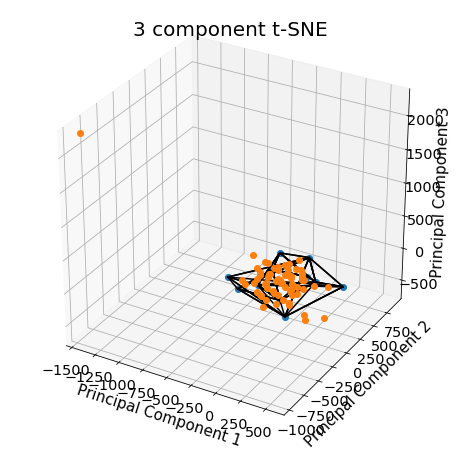

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax = plot_generator()
ax.plot(tsneout[:,0], tsneout[:,1],tsneout[:,2], 'o')
for simplex in hull.simplices:
    ax.plot(tsneout[simplex, 0], tsneout[simplex, 1],tsneout[simplex, 2], 'k-')
ax.plot(data[:,0], data[:,1],data[:,2], 'o')

plt.show() 
plt.savefig('t-SNE convex Haull with Outliyers.png')

In [ ]:
energy:23,37, 5,33,78
dopplar_UD: 55,62,63,65,73,75
